In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dataset= pd.read_csv('train.csv')
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


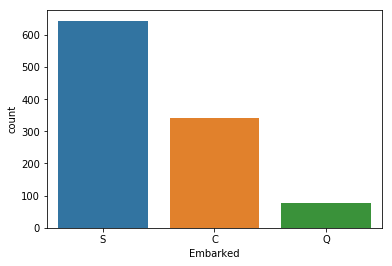

In [4]:
sns.countplot(dataset['Survived'], data=dataset)
sns.countplot(dataset['Sex'], data=dataset)
dataset['Embarked'].unique()
sns.countplot(dataset['Embarked'], data=dataset)

In [5]:
X= dataset.iloc[:,[2,4,5,6,7]].values
#it shows age has some missing value
y= dataset.iloc[:,1].values
# X.head()
# X.info()
X

array([[3, 'male', 22.0, 1, 0],
       [1, 'female', 38.0, 1, 0],
       [3, 'female', 26.0, 0, 0],
       ...,
       [3, 'female', nan, 1, 2],
       [1, 'male', 26.0, 0, 0],
       [3, 'male', 32.0, 0, 0]], dtype=object)

In [7]:
from sklearn.preprocessing import Imputer,LabelEncoder,OneHotEncoder
mis = Imputer(missing_values= 'NaN',strategy='mean',axis=0)
mis = mis.fit(X[:,2:3])
X[:,2:3] = mis.transform(X[:,2:3])
X

array([[3, 'male', 22.0, 1, 0],
       [1, 'female', 38.0, 1, 0],
       [3, 'female', 26.0, 0, 0],
       ...,
       [3, 'female', 29.69911764705882, 1, 2],
       [1, 'male', 26.0, 0, 0],
       [3, 'male', 32.0, 0, 0]], dtype=object)

In [18]:
label_x = LabelEncoder()
label_x.fit_transform(X[:,1])
X[:,1]=label_x.fit_transform(X[:,1])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
print('confusion_matrix\n',cm)
print('\nclassification_report\n', classification_report(y_test,y_pred))

classifier.score(X_test,y_test)

confusion_matrix
 [[91 14]
 [23 51]]

classification_report
              precision    recall  f1-score   support

          0       0.80      0.87      0.83       105
          1       0.78      0.69      0.73        74

avg / total       0.79      0.79      0.79       179



0.7932960893854749